<a href="https://colab.research.google.com/github/MJ-7-Kang/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_4%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 오픈소스 기반 데이터 분석 4강 - 데이터 수집


In [ ]:
import pandas as pd

## data.csv 파일 읽기
df=pd.read_csv('data.csv',encoding='utf-8',sep=',',header=0)

print(df)

           날짜    체중  골격근량  체지방량
0  2025.02.06  64.7  30.0  11.1
1  2025.02.04  64.0  29.3  11.6


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 4-2 JSON 파일 읽기



In [ ]:
import json
import pandas as pd

## data.json 파일 출력
with open ('data.json', mode='r',encoding='utf-8') as f:
    data=json.load(f)
print(data)
## data.json 파일 DataFrame 읽기
df = pd.read_json ('data.json', orient='records', encoding='utf-8')#, lines=false)

print(df)

{'매출데이터': [{'월': '2025-01', '매출액': 1000000, '비용': 700000, '이익': 300000}, {'월': '2025-02', '매출액': 1200000, '비용': 800000, '이익': 400000}, {'월': '2025-03', '매출액': 1500000, '비용': 900000, '이익': 600000}]}
                                               매출데이터
0  {'월': '2025-01', '매출액': 1000000, '비용': 700000,...
1  {'월': '2025-02', '매출액': 1200000, '비용': 800000,...
2  {'월': '2025-03', '매출액': 1500000, '비용': 900000,...


## 4-3 텍스트 파일 읽기 및 데이터 추출

In [ ]:
import re

## 파일(callcenter20250301.log) 오픈 및 읽기
with open('callcenter20250301.log', 'r', encoding='utf-8') as f:
    content = f.read()

## 주민등록번호 패턴 생성
pattern = re.compile (r'(\d{6})-(\d{7})')

## 주민등록번호 마스킹
masked_content = pattern.sub (r'\1-*******', content)

## 마스킹된 파일(callcenter20250301_masked.log) 오픈 및 쓰기
with open ('callcenter20250301_masked.log.txt', mode='w') as f:
    f.write (masked_content)

print("주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.")

주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.


## 4-4 Open-Meteo의 무료 날씨 API를 통한 특정 지역 온도 조회

In [ ]:
import requests
import json

url = "https://api.open-meteo.com/v1/forecast?=&=&current=temperature_2m"
params = {
    "latitude": "37.58638333",
    "longitude": "127.0203333",
    "current": "temperature_2m"
}

try:
    ## URL 및 파라미터 전송
    response = requests.get (url, params=params)
    response.raise_for_status()

    ## JSON 데이터 읽기
    data = response.json()

    print("API 응답:", data)
    print("서울시 종로구의 현재 온도는 : {0}{1} 입니다.".format(data['current']['temperature_2m'], data['current_units']['temperature_2m']))

except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")

API 응답: {'latitude': 37.6, 'longitude': 127.0, 'generationtime_ms': 0.03552436828613281, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 29.0, 'current_units': {'time': 'iso8601', 'interval': 'seconds', 'temperature_2m': '°C'}, 'current': {'time': '2025-10-09T01:45', 'interval': 900, 'temperature_2m': 19.2}}
서울시 종로구의 현재 온도는 : 19.2°C 입니다.


## 4-5 Selenium과 lxml을 이용한 웹 스크래핑

In [ ]:
!curl -o google-chrome-stable_current_amd64.deb https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt install ./google-chrome-stable_current_amd64.deb -y
!pip install selenium webdriver_manager

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  114M  100  114M    0     0   228M      0 --:--:-- --:--:-- --:--:--  229M
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'google-chrome-stable' instead of './google-chrome-stable_current_amd64.deb'
The following additional packages will be installed:
  libvulkan1 mesa-vulkan-drivers
The following NEW packages will be installed:
  google-chrome-stable libvulkan1 mesa-vulkan-drivers
0 upgraded, 3 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.9 MB/131 MB of archives.
After this operation, 448 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libvulkan1 amd64 1.3.204.1-2 [128 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 mesa-vulkan-drivers amd64 23.2.1-1ubuntu3.1~22.04.3 [10.7

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from lxml import html
import time

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')               # 브라우저 창 없이 실행
chrome_options.add_argument('--no-sandbox')             # 보안모드 비활성화 (Colab 필수)
chrome_options.add_argument('--disable-dev-shm-usage')  # 메모리 부족 방지 (Colab 필수)
chrome_options.add_argument('--window-size=1920x1080')  # 창 크기 설정(가상)
chrome_options.add_argument('--disable-gpu')            # GPU 가속 비활성화 (일부 환경 안정성)
chrome_options.binary_location = "/usr/bin/google-chrome-stable"  # Colab용 크롬 경로 지정

## 드라이버 실행
driver = webdriver.Chrome(options=chrome_options)

## 사이트 접속
url = 'https://professor.knou.ac.kr/jaehwachung/index.do'
driver.get(url)

## 사이트 접속 대기
time.sleep(2)

## 페이지 제목 출력
page_source = driver.page_source
tree = html.fromstring (page_source)
title_text = tree.xpath ('//title/text()')
print (title_text)
## 드라이버 종료
driver.quit()

ModuleNotFoundError: No module named 'selenium'


# 실습 시나리오

In [8]:
# 한글 처리를 위한 matplotlib 설정 (1)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [ ]:
리소스 재시작

In [1]:
# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import matplotlib.pyplot as plt
import seaborn as sns

## 공공데이터 포털 가입 및 데이터 신청

- [https://www.data.go.kr](https://www.data.go.kr)
- 한국환경공단 에어코리아 대기오염정보 데이터 신청

2015 01 API 호출 성공 
2015 02 API 호출 성공 
2015 03 API 호출 성공 
2015 04 API 호출 성공 
2015 05 API 호출 성공 
2015 06 API 호출 성공 
2015 07 API 호출 성공 
2015 08 API 호출 성공 
2015 09 API 호출 성공 
2015 10 API 호출 성공 
2015 11 API 호출 성공 
2015 12 API 호출 성공 
2016 01 API 호출 성공 
2016 02 API 호출 성공 
2016 03 API 호출 성공 
2016 04 API 호출 성공 
2016 05 API 호출 성공 
2016 06 API 호출 성공 
2016 07 API 호출 성공 
2016 08 API 호출 성공 
2016 09 API 호출 성공 
2016 10 API 호출 성공 
2016 11 API 호출 성공 
2016 12 API 호출 성공 
2017 01 API 호출 성공 
2017 02 API 호출 성공 
2017 03 API 호출 성공 
2017 04 API 호출 성공 
2017 05 API 호출 성공 
2017 06 API 호출 성공 
2017 07 API 호출 성공 
2017 08 API 호출 성공 
2017 09 API 호출 성공 
2017 10 API 호출 성공 
2017 11 API 호출 성공 
2017 12 API 호출 성공 
2018 01 API 호출 성공 
2018 02 API 호출 성공 
2018 03 API 호출 성공 
2018 04 API 호출 성공 
2018 05 API 호출 성공 
2018 06 API 호출 성공 
2018 07 API 호출 성공 
2018 08 API 호출 성공 
2018 09 API 호출 성공 
2018 10 API 호출 성공 
2018 11 API 호출 성공 
2018 12 API 호출 성공 
2019 01 API 호출 성공 
2019 02 API 호출 성공 
2019 03 API 호출 성공 
2019 04 API 호출 성공 
2019 05 API 

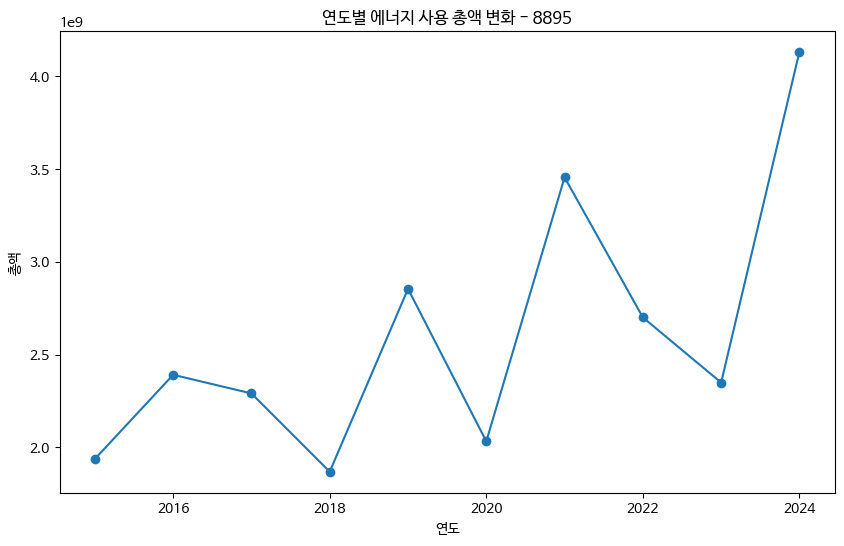

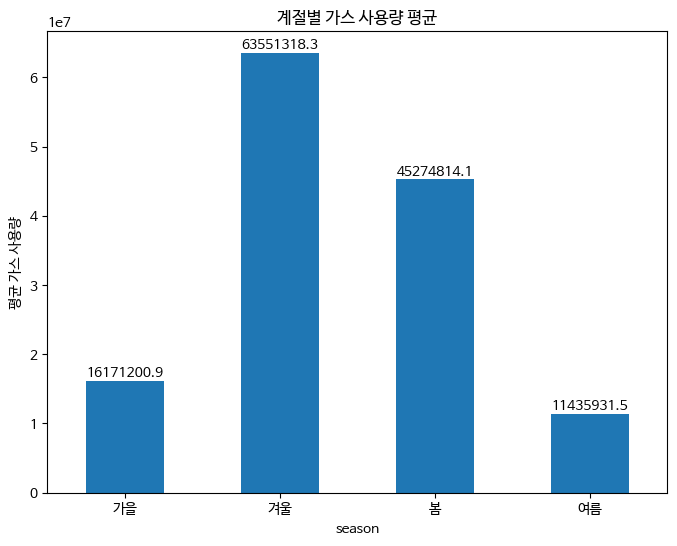

In [3]:

import requests
import pandas as pd
import time

API_KEY = "7843766f7a6d7975363349635a6b65"
SERVICE_NAME = "energyUseDataSummaryInfo"  # 회원유형별 통계정보 서비스명
BASE_URL = f"http://openapi.seoul.go.kr:8088/{API_KEY}/json/energyUseDataSummaryInfo/1/5"
MEMBER_TYPE="개인"

all_data = []

for year in range(2015, 2024+1):
   for month in range(1, 12+1):
      str_year = str(year)
      str_month = str(month).zfill(2)
      url = f"{BASE_URL}/{str_year}/{str_month}/"
      #print (url)

      response = requests.get(url, timeout=10)
      if response.status_code == 200:
            print(str_year,str_month,"API 호출 성공", '\r')
            data = response.json()
            #print(data)

            if SERVICE_NAME in data:
                 result = data[SERVICE_NAME]
                 if 'row' in result:
                     rows = result['row']
                     for row in rows:
                         all_data.append(row)
                 else:
                     # 해당 월에 데이터가 없을 경우
                     print(f"[{str_year}-{str_month}] 데이터가 없습니다.")

            time.sleep(1)
      else:
            print(f"API 호출 실패: {response.status_code}",'\r')

if all_data:
    df_01 = pd.DataFrame(all_data) # 수집된 데이터를 데이터프레임으로 변환
df_01

df_gi = df_01[df_01['MM_TYPE'] == '개인']
df_gi

df_02 = df_gi[['YEAR', 'MON', 'EUS', 'GUS', 'WUS', 'HUS']]
df_02

df = df_02.apply(pd.to_numeric)
df

# output_filename = f"ecomileage_energy_usage_{start_year}_{end_year}.csv"
# df.to_csv(output_filename, index=False, encoding='utf-8-sig')

# print(f"\n총 {len(df)}건의 데이터를 수집하여 '{output_filename}' 파일로 저장했습니다.")


# add year col
df['year'] = df['YEAR']
# add season col
def get_season(month):
    if int(month) in [3, 4, 5]:
        return '봄'
    elif int(month) in [6, 7, 8]:
        return '여름'
    elif int(month) in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

# add season col
#df['season'] = df['날짜'].apply(lambda x: int(x[-2:])).apply(get_season)

df['season'] = df['MON'].apply(get_season)
df

# output_filename = f"ecomileage_energy_usage_{start_year}_{end_year}.csv"
# df.to_csv(output_filename, index=False, encoding='utf-8-sig')

# print(f"\n총 {len(df)}건의 데이터를 수집하여 '{output_filename}' 파일로 저장했습니다.")

# 연도별 총 금액 계산
yearly_sum = df.groupby('year')[['EUS', 'GUS', 'WUS', 'HUS']].sum().sum(axis=1)
# 판다스 선 그래프
ax = yearly_sum.plot(kind='line', marker='o', figsize=(10, 6),
                     title="연도별 에너지 사용 총액 변화 - 8895")
ax.set_xlabel("연도")
ax.set_ylabel("총액")
#plt.show()


# 계절별 가스 사용 금액 평균 계산
season_avg = df.groupby('season')['GUS'].mean()
# 막대 그래프 시각화
# rot=0은 막대 그래프의 **x축 눈금 라벨 회전 각도(rotation)**를 지정하는 옵션
# 0으로 설정하지 않으면 x축 라벨(봄,여름, 가을, 겨울)이 90도 회전하여 보임
ax = season_avg.plot(kind='bar', figsize=(8, 6), title="계절별 가스 사용량 평균", rot=0)
# y축 라벨
ax.set_ylabel("평균 가스 사용량")

# 각 막대에 수치 표시
# ax.text(x좌표, y좌표, 문자열, ...)은 그래프 위 특정 위치에 글씨를 출력하는 함수
# 여기서 x좌표=i, y좌표=value이므로 각 막대의 꼭대기 위치에 텍스트가 찍히게 된다.
# f"{value:.1f}"는 소수점 첫째 자리까지 반올림해 문자열로 표시한다. 예: 123.456 → "123.5".
# ha='center'는 가로 정렬(horizontal alignment)을 가운데로 맞춘다. 즉, 막대의 가운데 위에 글자가 위치한다.
# va='bottom'은 세로 정렬(vertical alignment)을 아래쪽 기준으로 맞춘다. 즉, 글자가 막대 위에 딱 붙어서 표시된다.
# for은 모든 막대의 꼭대기 위치에 해당 막대의 값(평균 난방 금액)을 소수점 한 자리로 표시해 주는 역할을 한다.
for i, value in enumerate(season_avg):
    ax.text(i, value, f"{value:.1f}", ha='center', va='bottom')


In [ ]:
import requests
import pandas as pd
import time
from tqdm import tqdm

# 발급받은 인증키를 입력하세요.
API_KEY = "7843766f7a6d7975363349635a6b65"

# API 정보 설정
SERVICE_NAME = "energyUseDataSummaryInfo"  # 회원유형별 통계정보 서비스명
REQUEST_TYPE = "json"
BASE_URL = f"http://openapi.seoul.go.kr:8088/{API_KEY}/{REQUEST_TYPE}/{SERVICE_NAME}"

# 수집할 기간 설정
start_year = 2015
end_year = 2024

# 수집된 데이터를 저장할 리스트
all_data = []

# 개인 유형 데이터만 필터링하기 위한 회원유형 코드 (01: 개인)

print("데이터 수집을 시작합니다...")

for year in tqdm(range(start_year, end_year + 1), desc="연도별 데이터 수집"):
    for month in range(1, 13):
        # YYYY, MM 포맷으로 년도와 월을 문자열로 변환
        str_year = str(year)
        str_month = str(month).zfill(2)

        # 요청 파라미터 조합 (회원유형, 년도, 월)
        # 1-1000은 한 번에 가져올 데이터의 범위를 지정합니다. API의 최대 요청 건수에 따라 조절이 필요합니다.
        url = f"{BASE_URL}/1/5/{MEMBER_TYPE}/{str_year}/{str_month}/"

        try:
            response = requests.get(url, timeout=10)
            response.raise_for_status()  # HTTP 오류 발생 시 예외 발생
            data = response.json()

            if SERVICE_NAME in data:
                result = data[SERVICE_NAME]
                if 'row' in result:
                    rows = result['row']
                    for row in rows:
                        all_data.append(row)
                else:
                    # 해당 월에 데이터가 없을 경우
                    print(f"[{str_year}-{str_month}] 데이터가 없습니다.")
            else:
                # API 응답 구조가 예상과 다를 경우
                print(f"[{str_year}-{str_month}] API 응답이 올바르지 않습니다: {data}")

        except requests.exceptions.RequestException as e:
            print(f"[{str_year}-{str_month}] API 호출 중 오류 발생: {e}")
        except Exception as e:
            print(f"[{str_year}-{str_month}] 데이터 처리 중 오류 발생: {e}")

        # API 호출 제한 방지를 위해 1초 대기
        time.sleep(1)

# 수집된 데이터를 데이터프레임으로 변환
if all_data:
    df = pd.DataFrame(all_data)

    # 데이터를 CSV 파일로 저장
    output_filename = f"ecomileage_individual_energy_usage_{start_year}_{end_year}.csv"
    df.to_csv(output_filename, index=False, encoding='utf-8-sig')

    print(f"\n총 {len(df)}건의 데이터를 수집하여 '{output_filename}' 파일로 저장했습니다.")
else:
    print("\n수집된 데이터가 없습니다. API 키 및 설정 정보를 확인하세요.")


데이터 수집을 시작합니다...


연도별 데이터 수집:   0%|          | 0/10 [00:00<?, ?it/s]

[2015-01] API 응답이 올바르지 않습니다: {'RESULT': {'CODE': 'INFO-200', 'MESSAGE': '해당하는 데이터가 없습니다.'}}
[2015-02] API 응답이 올바르지 않습니다: {'RESULT': {'CODE': 'INFO-200', 'MESSAGE': '해당하는 데이터가 없습니다.'}}
[2015-03] API 응답이 올바르지 않습니다: {'RESULT': {'CODE': 'INFO-200', 'MESSAGE': '해당하는 데이터가 없습니다.'}}
[2015-04] API 응답이 올바르지 않습니다: {'RESULT': {'CODE': 'INFO-200', 'MESSAGE': '해당하는 데이터가 없습니다.'}}


연도별 데이터 수집:   0%|          | 0/10 [00:06<?, ?it/s]


KeyboardInterrupt: 